In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it

from matplotlib import cm
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression 
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.regression.linear_model import OLS
from statsmodels.regression.linear_model import RegressionResults

%matplotlib inline

## Assignment 6: model selection and manifold learning

### Exercise 1
* Load the data set from file prostate.csv
* Carry out a best-subset linear regression analysis.
* Compute the AIC, BIC, five- and tenfold cross-validation estimates of prediction error
* Make conclusion

Prostate data info:

Predictors:
* lcavol
* lweight
* age
* lbph
* svi
* lcp
* gleason
* pgg45

outcome:
* lpsa

#### Reading the data

In [129]:
data = pd.read_csv('prostate.csv')
columns = list(data.columns)
n_samples = data.shape[0]

X, y = np.asarray(data)[:, :-1], np.asarray(data)[:, -1]

data

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
5,-1.049822,3.228826,50,-1.386294,0,-1.386294,6,0,0.765468
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468
7,0.693147,3.539509,58,1.536867,0,-1.386294,6,0,0.854415
8,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319
9,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319


#### Generating all combinations

In [130]:
combinations = []
for k in range(1, 9):
    comb = np.array(list(it.combinations(columns[:-1], k)))
    combinations.append(comb)


all_combinations = []
for i in range(len(combinations)):
    all_combinations += combinations[i].tolist()
all_combinations = np.array(all_combinations)

num_combinations = len(all_combinations)
print('num of combinations', num_combinations)

num of combinations 255


#### All scores

In [131]:
aic_scores, bic_scores, fivefold, tenfold = [], [], [], []
for i in range(num_combinations):
    combination = all_combinations[i]
    X = np.asarray(data[combination])
    LS = OLS(y, X)
    regression = LS.fit()
    aic_scores.append(regression.aic)
    bic_scores.append(regression.bic)
    fivefold.append(-cross_val_score(LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=5).mean())
    tenfold.append(-cross_val_score(LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=10).mean())

#### Result

In [132]:
print('------------Best-subset solution for different scores------------')
print('AIC:', all_combinations[np.argmin(np.abs(aic_scores))])
print('BIC:', all_combinations[np.argmin(np.abs(bic_scores))])
print('Fivefold CV:', all_combinations[np.argmin(np.abs(fivefold))])
print('Tenfold CV:', all_combinations[np.argmin(np.abs(tenfold))])

------------Best-subset solution for different scores------------
AIC: ['lcavol', 'lweight', 'age', 'lbph', 'svi']
BIC: ['lcavol', 'lweight', 'svi']
Fivefold CV: ['lcavol', 'lweight', 'age', 'pgg45']
Tenfold CV: ['lcavol', 'lweight', 'age', 'pgg45']


### Exercise 2
* Apply dimensionality reduction, try PCA, LLE, MDS, Laplacian Eigenmaps and t-SNE. Visualize data set.
* What can you say about clusters in the dataset?
* Build linear regression models using output produced by for different dimensionalities. Compute quality of the models.
* Make conclusion.

#### PCA

In [133]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [134]:
color_labels = data['lcavol']
colors = [cm.Vega10((y_) / max(color_labels)) for y_ in color_labels]

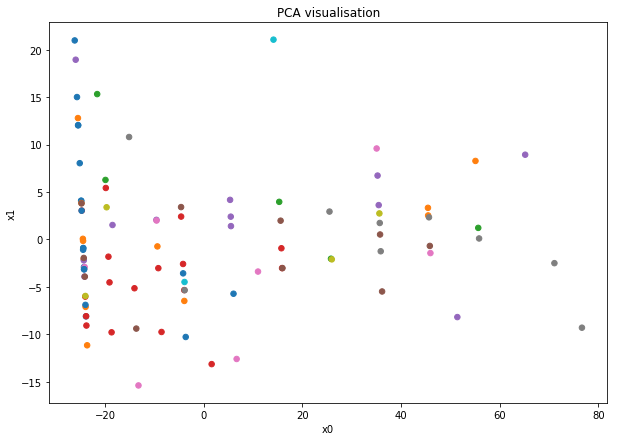

In [135]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s = 30)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('PCA visualisation')

In [136]:
LS = OLS(y, X_pca)
regression_pca = LS.fit()
print('-----Scores2D-----')
print('AIC =', regression_pca.aic)
print('BIC =', regression_pca.bic)

-----Scores2D-----
AIC = 471.035373372
BIC = 476.184795329


#### LLE

In [137]:
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X)

In [138]:
color_labels = data['lcavol']
colors = [cm.Vega10((y_) / max(color_labels)) for y_ in color_labels]

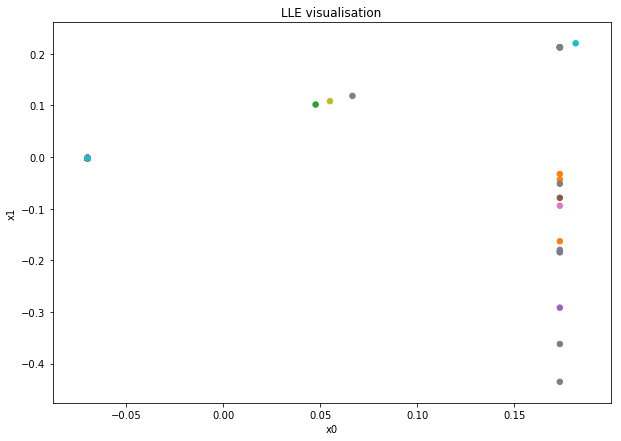

In [139]:
plt.figure(figsize=(10, 7))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=colors, s = 30)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('LLE visualisation')

In [140]:
LS = OLS(y, X_lle)
regression_lle = LS.fit()
print('-----Scores-----')
print('AIC =', regression_lle.aic)
print('BIC =', regression_lle.bic)

-----Scores-----
AIC = 473.963278561
BIC = 479.112700518


#### MDS

In [141]:
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X)

In [142]:
color_labels = data['lcavol']
colors = [cm.Vega10((y_) / max(color_labels)) for y_ in color_labels]

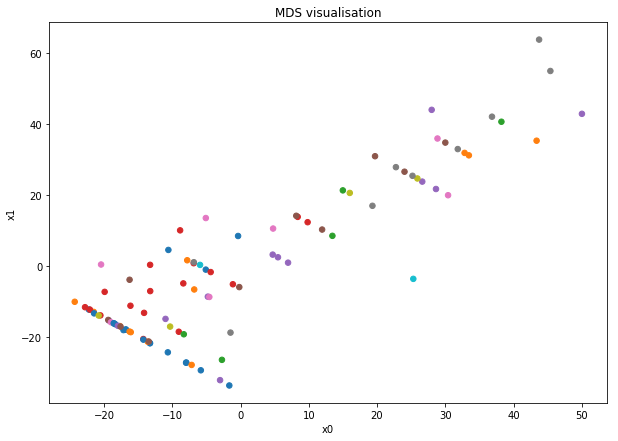

In [143]:
plt.figure(figsize=(10, 7))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=colors, s = 30)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('MDS visualisation')

In [144]:
LS = OLS(y, X_mds)
regression_mds = LS.fit()
print('-----Scores-----')
print('AIC =', regression_mds.aic)
print('BIC =', regression_mds.bic)

-----Scores-----
AIC = 471.016233605
BIC = 476.165655562


#### Laplacian Eigenmaps (Spectral Embedding)

In [145]:
se = SpectralEmbedding(n_components=2)
X_se = se.fit_transform(X)

In [146]:
color_labels = data['lcavol']
colors = [cm.Vega10((y_) / max(color_labels)) for y_ in color_labels]

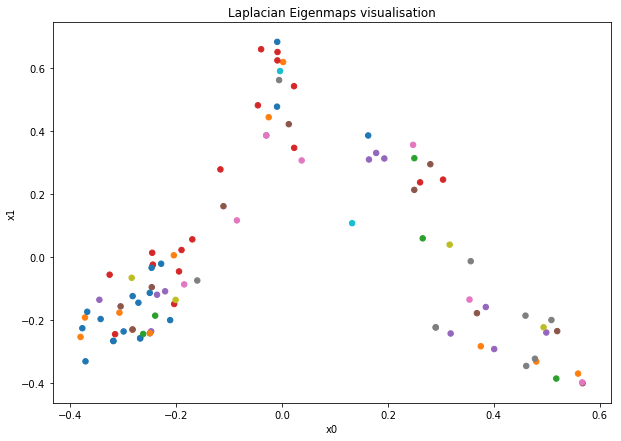

In [147]:
plt.figure(figsize=(10, 7))
plt.scatter(X_se[:, 0], X_se[:, 1], c=colors, s = 30)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Laplacian Eigenmaps visualisation')

In [148]:
LS = OLS(y, X_se)
regression_se = LS.fit()
print('-----Scores-----')
print('AIC =', regression_se.aic)
print('BIC =', regression_se.bic)

-----Scores-----
AIC = 469.956773085
BIC = 475.106195042


#### t-SNE

In [149]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [151]:
color_labels = data['lcavol']
colors = [cm.Vega10((y_) / max(color_labels)) for y_ in color_labels]

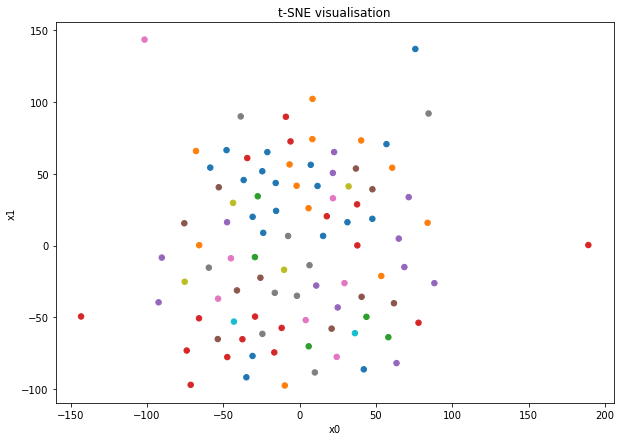

In [152]:
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, s = 30)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('t-SNE visualisation')

In [154]:
LS = OLS(y, X_tsne)
regression_tsne = LS.fit()
print('-----Scores-----')
print('AIC =', regression_tsne.aic)
print('BIC =', regression_tsne.bic)

-----Scores-----
AIC = 473.309819817
BIC = 478.459241774


In [150]:
print ('Is NAN?', np.isnan(X).any())
print ('Is INF?', np.isinf(X).any())

Is NAN? False
Is INF? False


#### Results

In [155]:
d = {'AIC': [regression_pca.aic, regression_lle.aic, regression_mds.aic, regression_se.aic, regression_tsne.aic], 
     'BIC': [regression_pca.bic, regression_lle.bic, regression_mds.bic, regression_se.bic, regression_tsne.bic]}
df = pd.DataFrame(data=d, index=['PCA', 'LLE', 'MDS', 'Laplacian Eigenmaps', 't-SNE'])
df

,AIC,BIC
PCA,471.035373,476.184795
LLE,473.963279,479.112701
MDS,471.016234,476.165656
Laplacian Eigenmaps,469.956773,475.106195
t-SNE,473.309820,478.459242


We see that Laplacian Eigenmaps has the best result. 